Lead Scoring Case Study

Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.
Although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that a lead is hot and most likely to convert.
There are some more problems presented by the company which the model should be able to adjust to if the company's requirement changes in the future.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df=pd.read_csv('C:/Users/Dell/Desktop/Leads.csv')

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Data Inspection

In [4]:
# checking the shape of the data
df.shape

(9240, 37)

We have 9240 rows and 37 columns in our leads dataset

In [5]:
# checking non null count and datatype of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Describing data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


We can see that there are missing values present in our data

In [7]:
#Check null values present in the data
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
#Check null values present in the data in percentage
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

Data Cleaning

In [10]:
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [11]:
#Find the columns having more than 35% missing values
missing_col=[]
for i in df.columns:
    if (df[i].isnull().mean())*100>35:
        missing_col.append(i)
print('The columns with more than 35% missing values are')
missing_col

The columns with more than 35% missing values are


['Specialization',
 'How did you hear about X Education',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [12]:
#Drop the columns with more than 35% missing values
for i in missing_col:
    df=df.drop(i,axis=1)

In [13]:
#Check null values percent present in the data after dropping
(df.isnull().sum()/df.shape[0])

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

In [14]:
#Check null values in percentage after dropping
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [15]:
#Find columns with more than 5% null values and replace with unknown
missing_col=[]
for i in df.columns:
    if (df[i].isnull().mean())*100>5:
        missing_col.append(i)
print('The columns with more than 5% missing vales are')
missing_col

The columns with more than 5% missing vales are


['Country',
 'What is your current occupation',
 'What matters most to you in choosing a course']

In [16]:
for i in missing_col:
    df[i]=df[i].fillna('Unknown')

In [17]:
#Check null values
df.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                     

In [18]:
#Check null values in percentage
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

In [19]:
df.shape

(9240, 27)

In [20]:
#Dropping rows with null values
df=df.dropna()

In [21]:
df.shape

(9074, 27)

In [22]:
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

Now we don't have any missing value in the dataset

In [23]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


Exploratory data analysis

Univariate Analysis and Bivariate Analysis
1) Converted
   
Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [24]:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

The lead conversion rate is 38%

2. Lead Origin

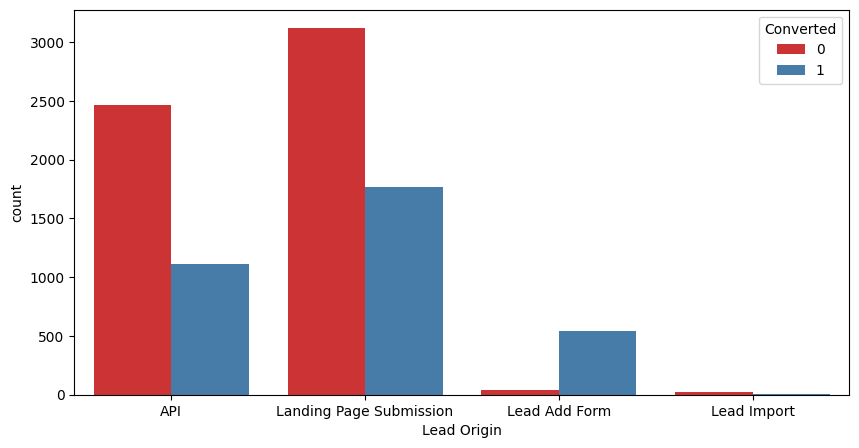

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data =df,palette='Set1')
plt.show()

Inference: API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
Lead Add Form has more than 90% conversion rate but count of lead are not very high.
Lead Import are very less in count.
To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

3. Lead Source

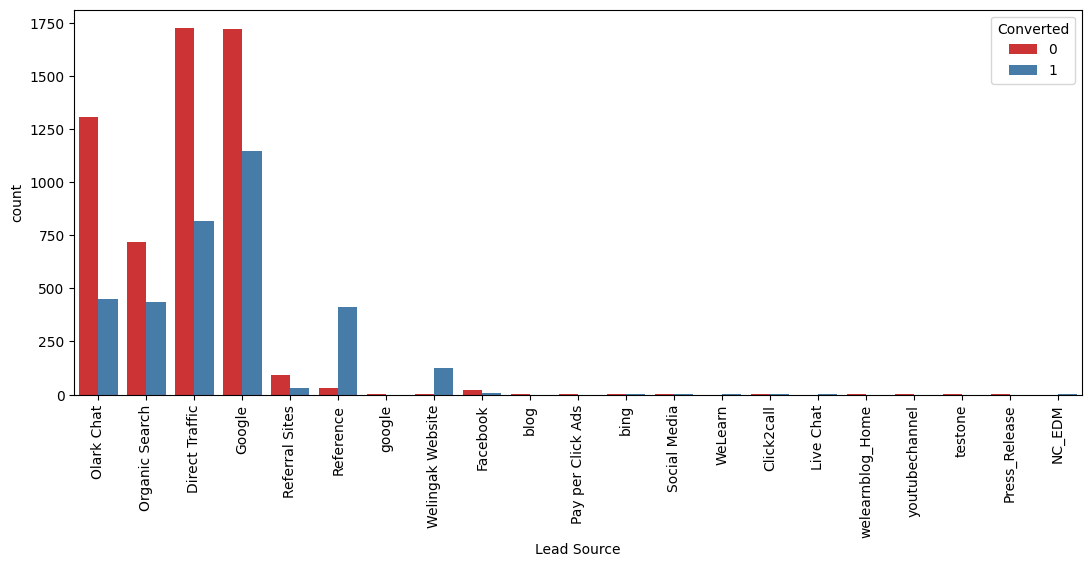

In [26]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data =df, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [27]:
# Need to replace 'google' with 'Google'
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

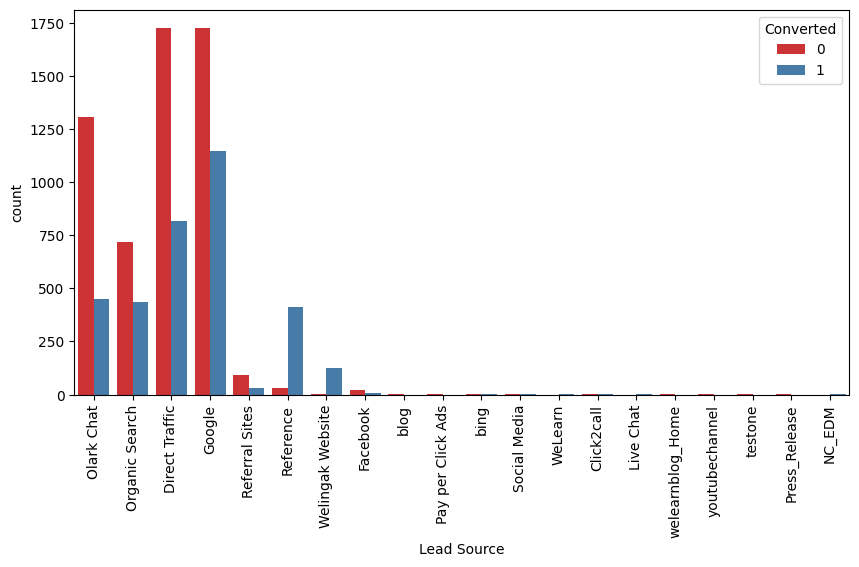

In [28]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference: 
Google and Direct traffic generates maximum number of leads.
Conversion of reference leads and leads through welingak website is high.
To improve overall lead conversion, focus should be on improving lead converion of olark chat, organic search, direct traffic, google leads and more leads to be generated from reference and welingak website.

4. Do not Email

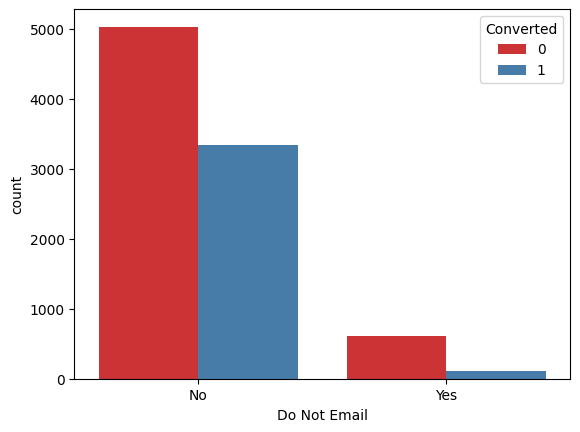

In [29]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = df,palette='Set1')
plt.show()

Inference: Most entries are 'No' so inference cannot be drawn with this parameter

5. Do not Call

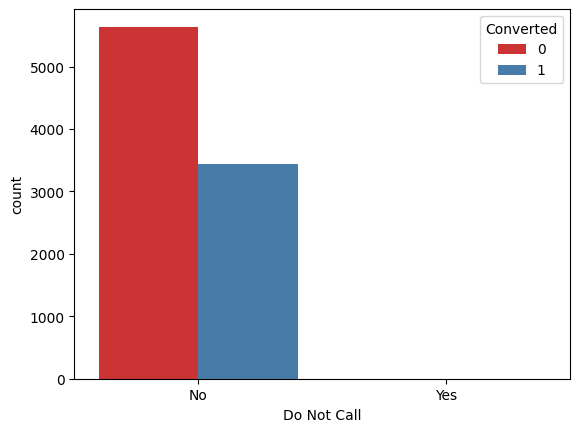

In [30]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = df,palette='Set1')
plt.show()

Inference: Most entries are 'No' so inference cannot be drawn with this parameter

6. Total Visits

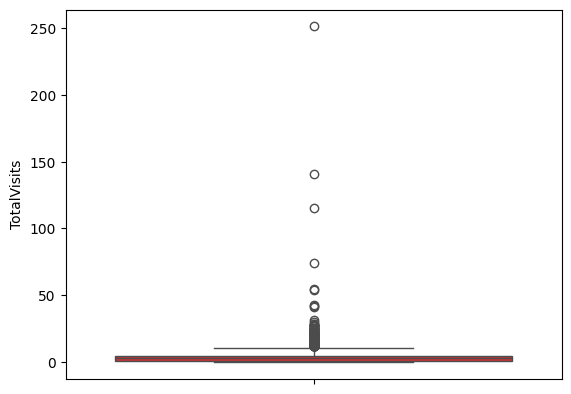

In [31]:
sns.boxplot(df['TotalVisits'],orient='vert',palette='Set1')
plt.show()

There are a number of outliers in the data

In [32]:
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

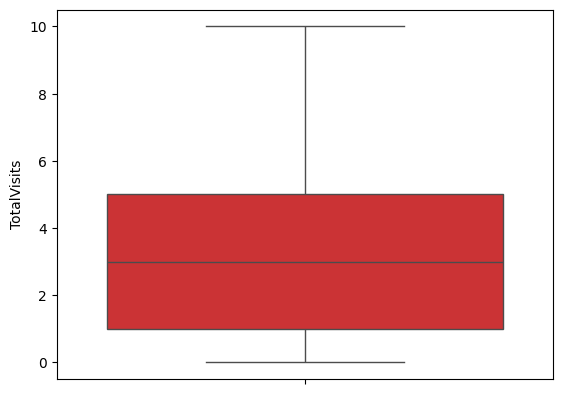

In [33]:
#Visualizing after capping
sns.boxplot(df['TotalVisits'],orient='vert',palette='Set1')
plt.show()

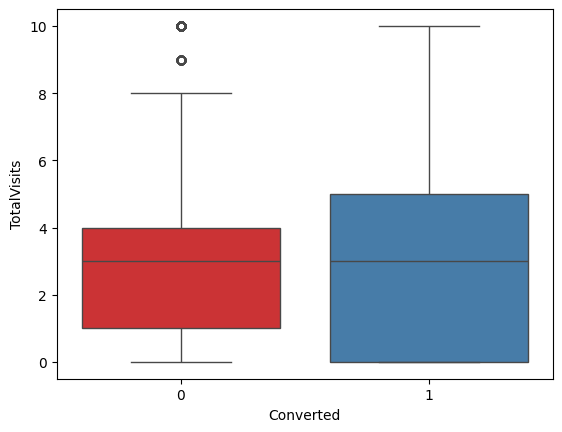

In [35]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df,palette='Set1')
plt.show()

Inference: Median for converted and not converted leads are the same, so nothing can be concluded

7. Total Time Spent on Website

In [36]:
df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

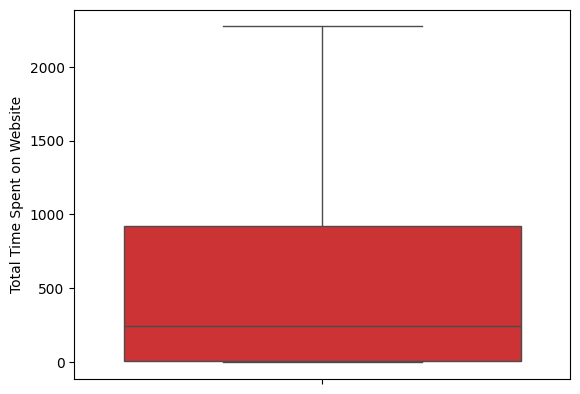

In [37]:
sns.boxplot(df['Total Time Spent on Website'],orient='vert',palette='Set1')
plt.show()

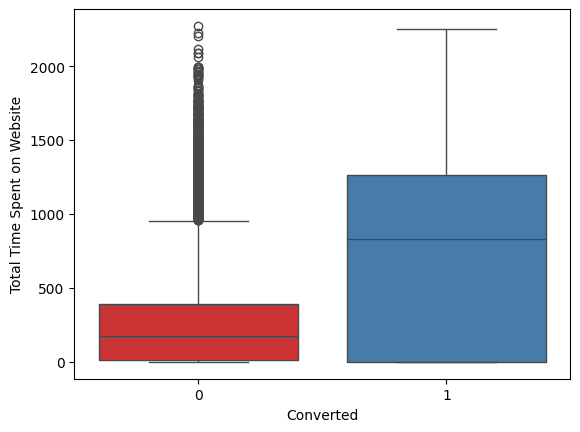

In [38]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df,palette='Set1')
plt.show()

Inference: Leads spending more time on the website are more likely to be converted, so Website should be made more engaging

8. Page Views Per Visit

In [39]:
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

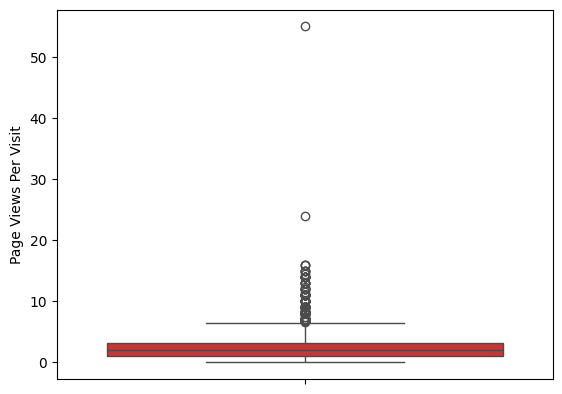

In [40]:
sns.boxplot(df['Page Views Per Visit'],orient='vert',palette='Set1')
plt.show()

There are a number of outliers in the data

In [41]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

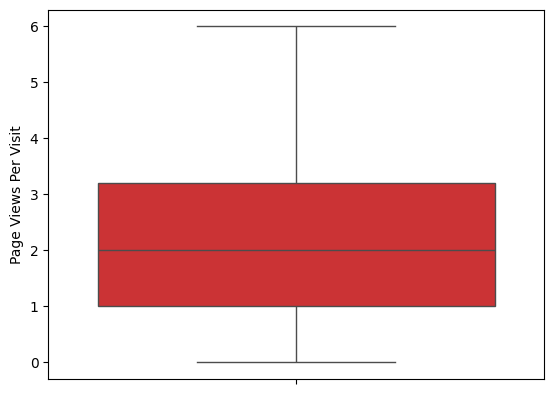

In [42]:
# Visualizing again after capping
sns.boxplot(df['Page Views Per Visit'],palette='Set1',orient='vert')
plt.show()

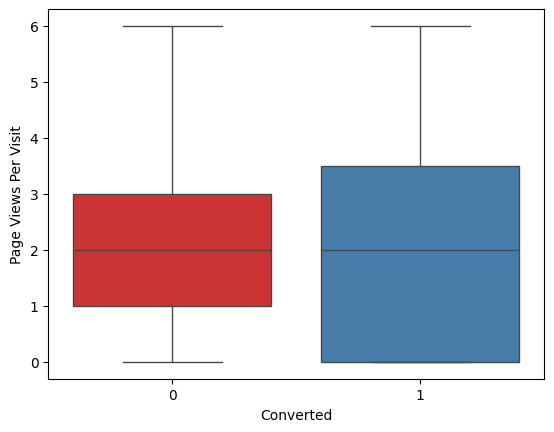

In [43]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =df,palette='Set1')
plt.show()

Inference: Median for converted and unconverted leads is the same, so nothing can be concluded

9. Last Activity

In [46]:
df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

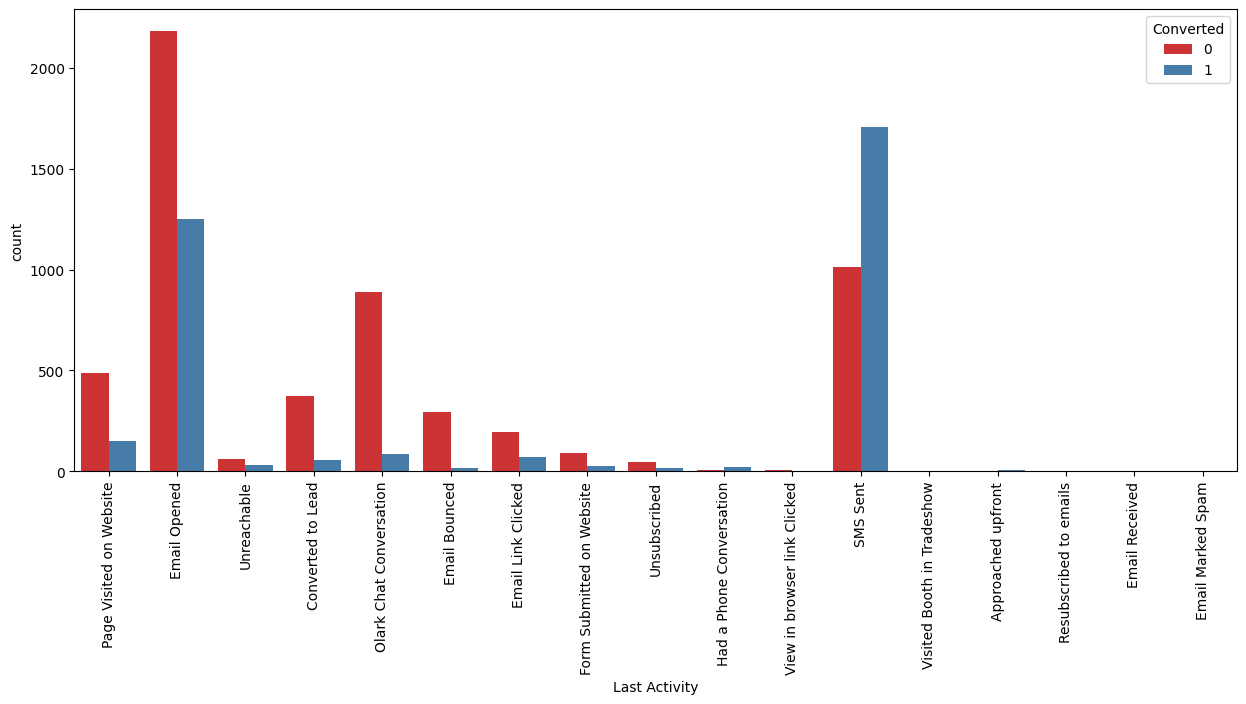

In [47]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference: Most of the leads have Email Opened as their last activity. Conversion rate for leads with last activity as SMS Sent is more than 60%.

10. Country

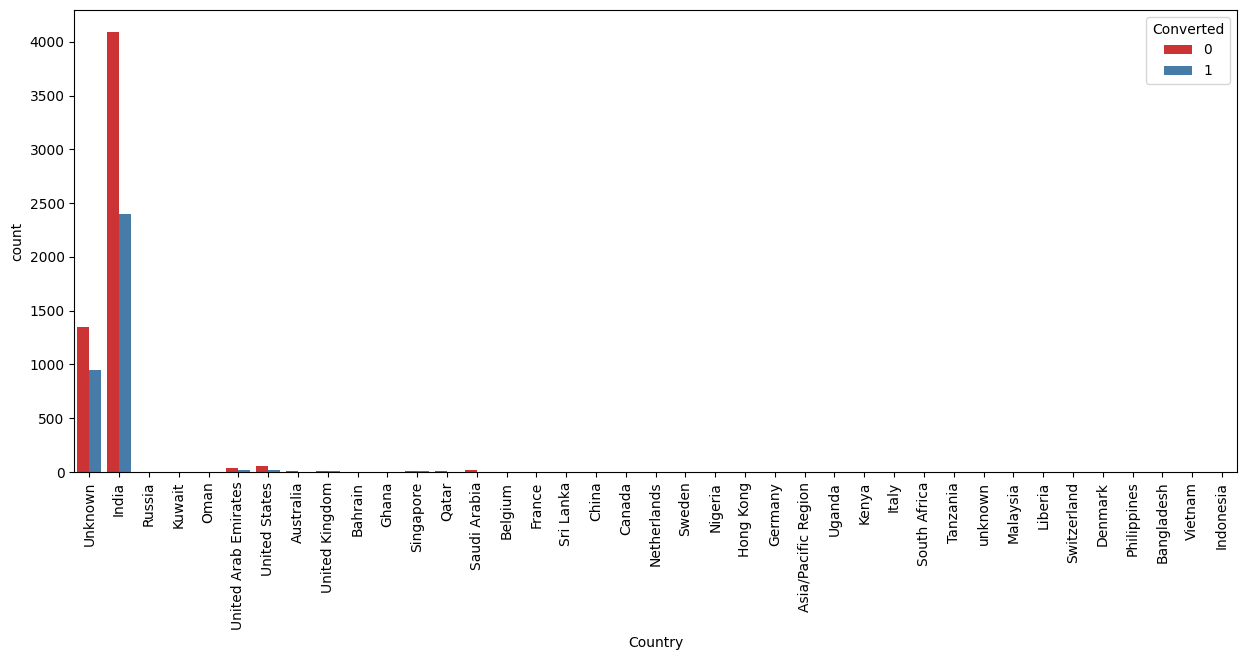

In [49]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference: Most values are 'India' no such inference can be drawn

11. What is your current occupation

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

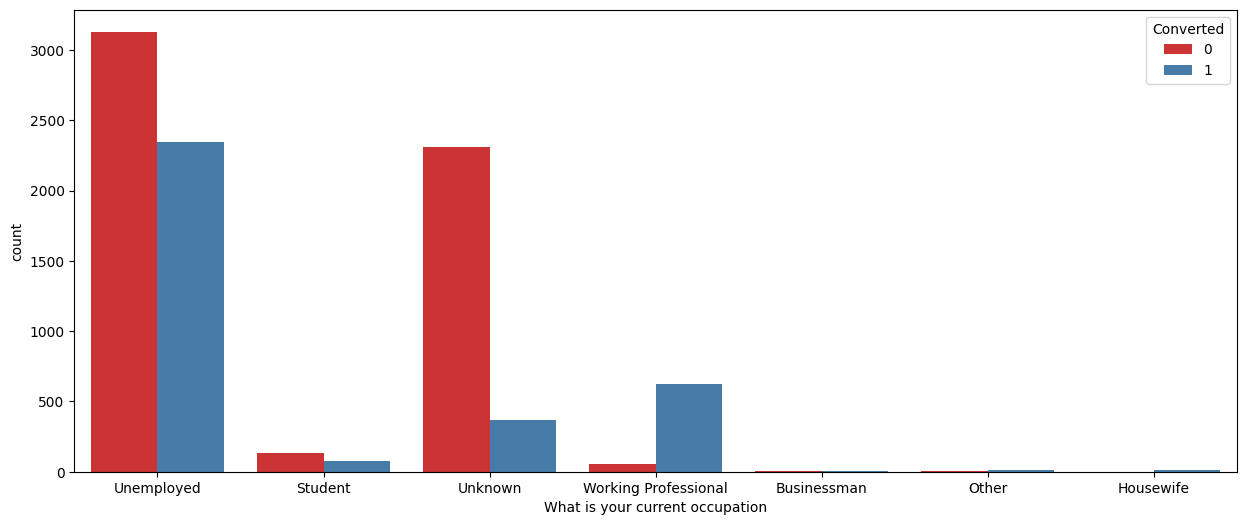

In [53]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df,palette='Set1')
plt.show()

Inference: Working Professionals have high chances of conversion. Unemployed leads are the most in numbers and has more than 40% conversion rate.

12. Search

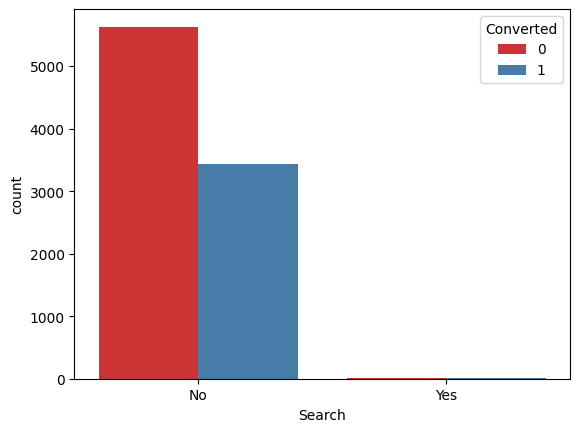

In [54]:
sns.countplot(x = "Search", hue = "Converted", data = df,palette='Set1')
plt.show()

Inference: Most entries are 'No', so no inference can be drawn with this parameter

13. Magazine

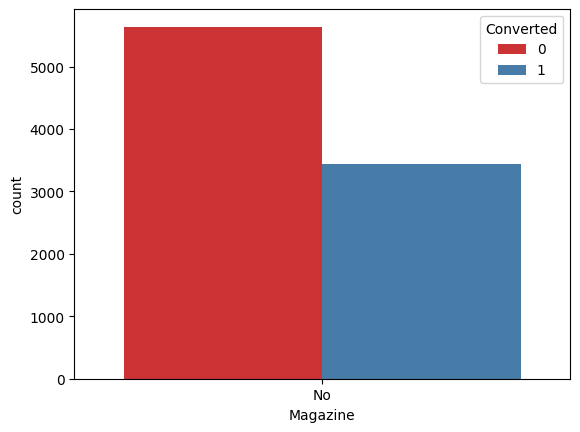

In [55]:
sns.countplot(x = "Magazine", hue = "Converted", data = df,palette='Set1')
plt.show()

Inference: Most entries are 'No', so no inference can be drawn with this parameter

14. Newspaper Article

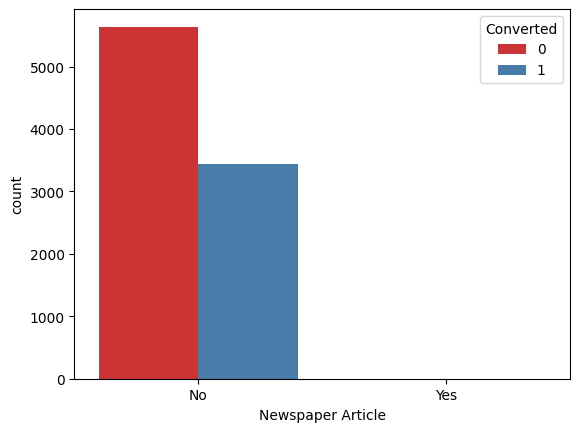

In [56]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df,palette='Set1')
plt.show()

Inference: Most entries are 'No', so no inference can be drawn with this parameter

15. X Education Forums

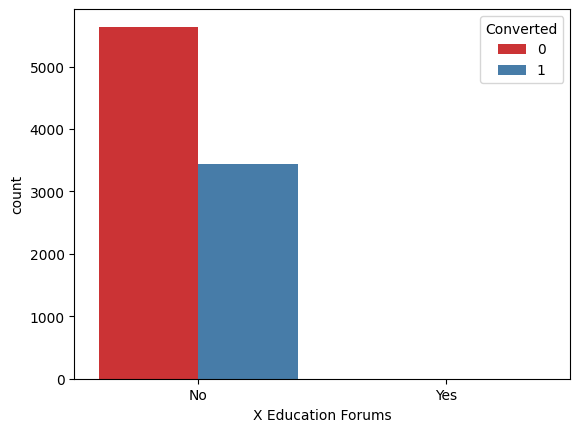

In [57]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = df,palette='Set1')
plt.show()

Inference: Most entries are 'No', so no inference can be drawn with this parameter

16. Newspaper

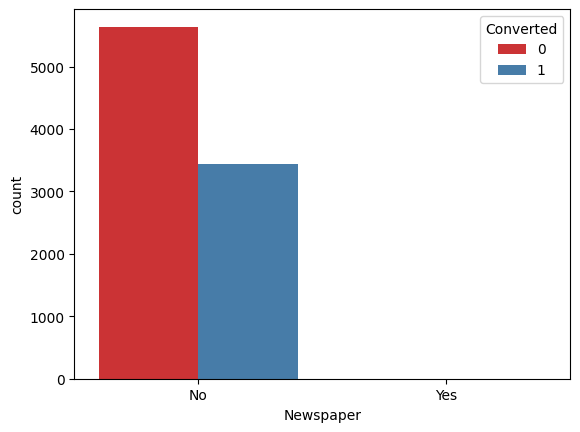

In [58]:
sns.countplot(x = "Newspaper", hue = "Converted", data = df,palette='Set1')
plt.show()

Inference: Most entries are 'No', so no inference can be drawn with this parameter

17. Digital Advertisement

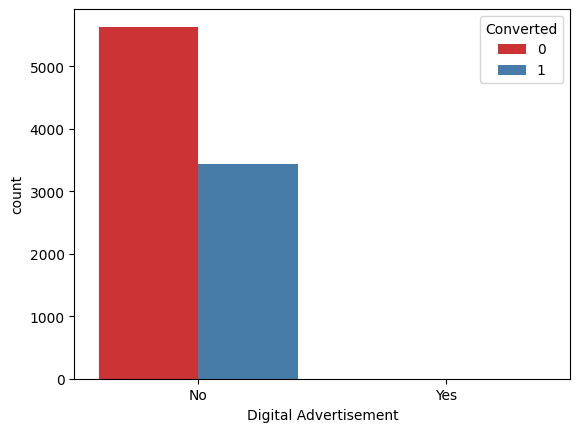

In [59]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df,palette='Set1')
plt.show()

Inference: Most entries are 'No', so no inference can be drawn with this parameter

18. Through Recommendations

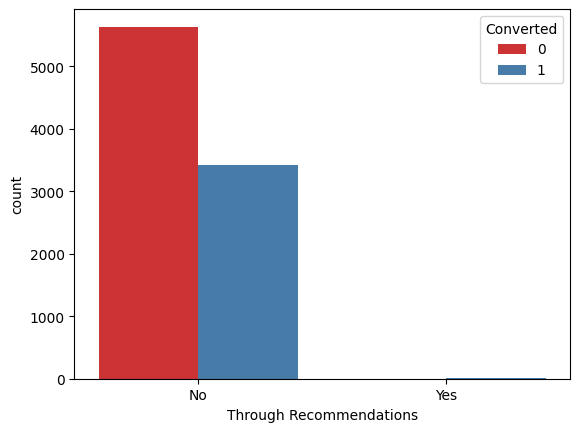

In [60]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df,palette='Set1')
plt.show()

Inference: Most entries are 'No', so no inference can be drawn with this parameter

19. Receive More Updates About Our Courses

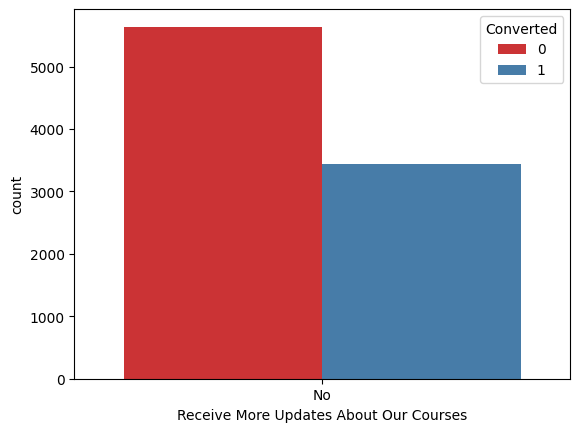

In [61]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df,palette='Set1')
plt.show()

Inference: Most entries are 'No', so no inference can be drawn with this parameter

20. Update me on Supply Chain Content

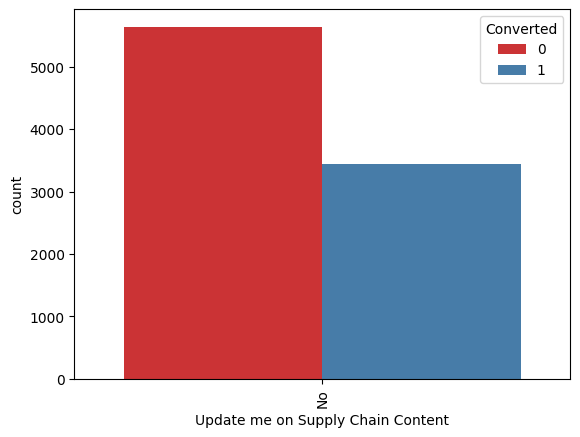

In [62]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference: Most entries are 'No', so no inference can be drawn with this parameter

21. Get updates on DM Content

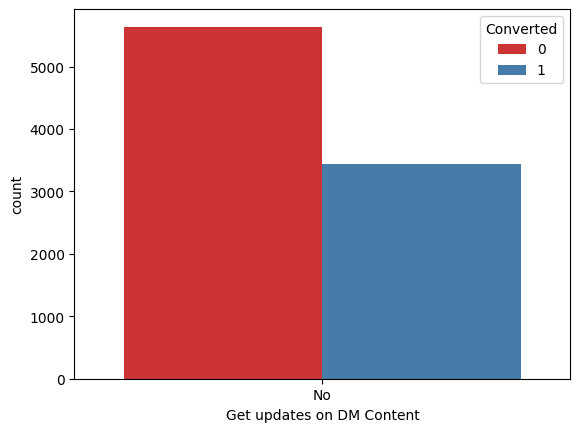

In [63]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df,palette='Set1')
plt.show()

Inference: Most entries are 'No', so no inference can be drawn with this parameter

22. I agree to pay the amount through cheque

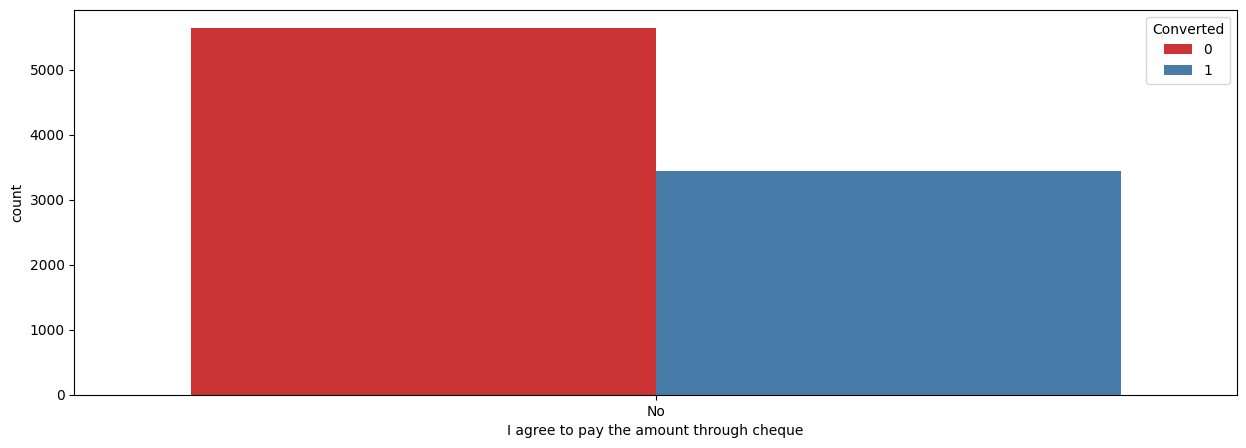

In [65]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df,palette='Set1')
plt.show()

Inference: Most entries are 'No', so no inference can be drawn with this parameter

23. A free copy of Mastering The Interview

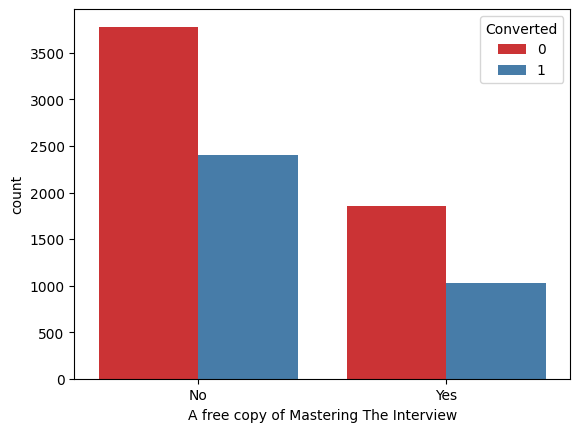

In [66]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df,palette='Set1')
plt.show()

Inference: Most entries are 'No', so no inference can be drawn with this parameter

24. Last Notable Activity

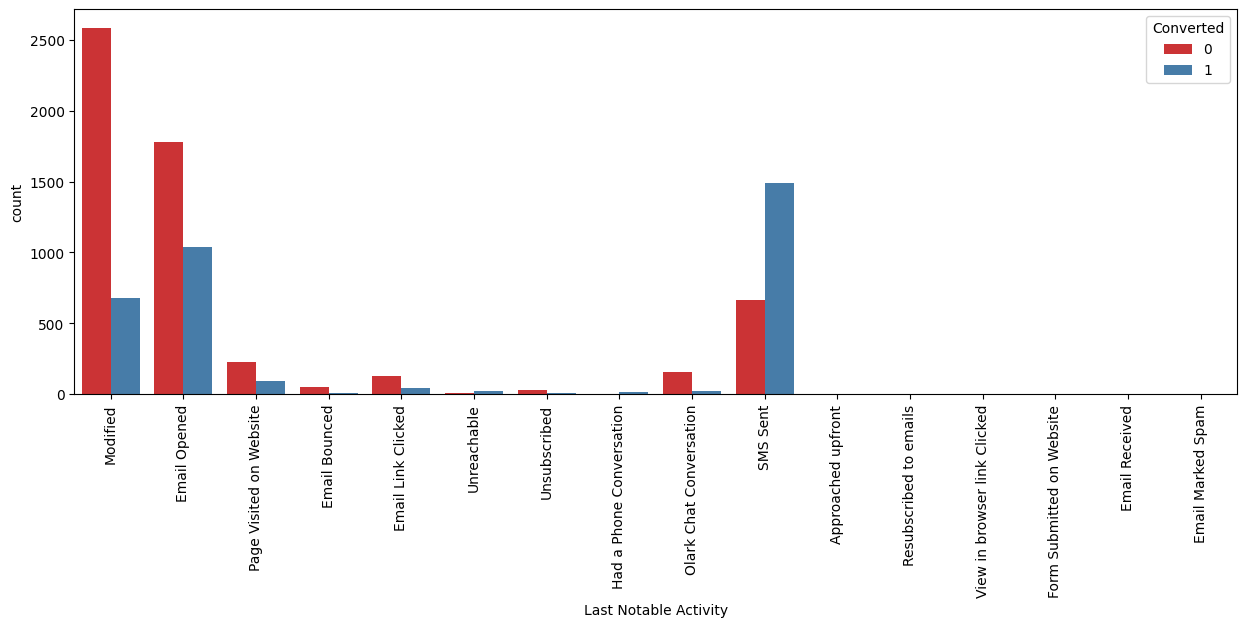

In [67]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference: SMS Sent has a conversion rate of around 70%

Results: Based on the Univariate Analysis we have seen that many columns are not adding any information to the model, hence we can drop them.

In [68]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [71]:
df = df.drop(['Lead Number','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],axis=1)

In [72]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,Modified


In [73]:
df.shape

(9074, 13)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 non-n

In [75]:
#Now Convert categorical to numerical
#Label encoder
cat_cols=df.loc[:,df.dtypes=='object']
cat_cols.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

In [76]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for i in cat_cols:
    df[i]=label_encoder.fit_transform(df[i])

In [77]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Last Notable Activity
0,4332,0,6,0,0,0,0.0,0,0.0,10,4,0,8
1,1527,0,7,0,0,0,5.0,674,2.5,5,4,0,4
2,5034,1,1,0,0,1,2.0,1532,2.0,5,3,0,4
3,462,1,1,0,0,0,1.0,305,1.0,13,4,0,8
4,1842,1,3,0,0,1,2.0,1428,1.0,1,4,0,8


In [80]:
df.shape

(9074, 11)

Train-Test Split

In [81]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Lead Origin,Lead Source,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Last Notable Activity
0,0,6,0.0,0,0.0,10,4,0,8
1,0,7,5.0,674,2.5,5,4,0,4
2,1,1,2.0,1532,2.0,5,3,0,4
3,1,1,1.0,305,1.0,13,4,0,8
4,1,3,2.0,1428,1.0,1,4,0,8


In [82]:
# Putting target variable to y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [83]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [84]:
X_test.shape

(2723, 9)

In [85]:
y_test.shape

(2723,)

In [86]:
df.corr()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Last Notable Activity
Prospect ID,1.000000,-0.004167,-0.002559,-0.011856,-0.003298,-0.000601,-0.002029,0.008071,0.009714,0.011639,0.005036
Lead Origin,-0.004167,1.000000,0.008511,0.209646,0.133015,0.073991,0.187540,0.048750,-0.035279,-0.221826,0.042475
Lead Source,-0.002559,0.008511,1.000000,0.155489,-0.253747,-0.267262,-0.312142,0.072873,0.042663,-0.019477,0.040288
Converted,-0.011856,0.209646,0.155489,1.000000,0.050742,0.359261,0.000329,0.236015,0.019241,-0.324417,0.208645
TotalVisits,-0.003298,0.133015,-0.253747,0.050742,1.000000,0.361207,0.766567,0.075359,-0.050991,-0.079046,-0.008354
Total Time Spent on Website,-0.000601,0.073991,-0.267262,0.359261,0.361207,1.000000,0.364735,0.072095,-0.028046,-0.147650,0.074532
Page Views Per Visit,-0.002029,0.187540,-0.312142,0.000329,0.766567,0.364735,1.000000,0.066754,-0.061349,-0.091326,0.006147
Last Activity,0.008071,0.048750,0.072873,0.236015,0.075359,0.072095,0.066754,1.000000,0.034385,-0.071370,0.750480
What is your current occupation,0.009714,-0.035279,0.042663,0.019241,-0.050991,-0.028046,-0.061349,0.034385,1.000000,0.544469,0.022234
What matters most to you in choosing a course,0.011639,-0.221826,-0.019477,-0.324417,-0.079046,-0.147650,-0.091326,-0.071370,0.544469,1.000000,-0.086344


In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Origin,Lead Source,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Last Notable Activity
3009,1,1,-0.432779,-0.160255,-0.155018,5,5,3,4
1012,1,1,-0.432779,-0.540048,-0.155018,2,6,3,1
9226,0,6,-1.150329,-0.888650,-1.265540,12,4,0,8
4750,1,1,-0.432779,1.643304,-0.155018,12,5,3,12
7987,1,1,0.643547,2.017593,0.122613,12,4,0,8


In [88]:
# Checking the Lead Conversion rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

Lead Conversion rate is 38%

Feature Selection Using RFE

In [90]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [91]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', True, 1),
 ('What is your current occupation', True, 1),
 ('What matters most to you in choosing a course', True, 1),
 ('Last Notable Activity', True, 1)]

In [93]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Lead Origin', 'Lead Source', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

Model Building

Assessing the model with StatsModels

Model-1

In [94]:
import statsmodels.api as sm

In [95]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2922.0
Date:                Mon, 27 Jan 2025   Deviance:                       5844.1
Time:                        23:46:34   Pearson chi2:                 6.51e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3382
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -5.9480      0.297    -20.034      0.000      -6.530      -5.366
Lead Origin                                       0.5326      0.055      9.626      0.000       0.424       0.641
Lead Source                                       0.1732      0.012     14.351      0.000       0.150       0.197
TotalVisits                                       0.1342      0.050      2.705      0.007       0.037       0.231
Total Time Spent on Website                       1.0703      0.038     28.373      0.000       0.996       1.144
Page Views Per Visit                             -0.5387      0.053    -10.193      0.000      -0.642      -0.435
Last Activity                                     0.1366      0.015      9.298      0.000       0.108       0.165
What is your current occupation                   0.8726      0.067     13.024      0.000       0.741       1.004
What matters most to you in choosing a course    -0.8002      0.035    -23.045      0.000      -0.868      -0.732
Last Notable Activity                             0.0022      0.016      0.133      0.894      -0.030       0.034
=================================================================================================================
"""

Since P-value of 'Last Notable Activity' is very high, we can drop this column

In [96]:
# Dropping the column 'Last Notable Activity'
col1 = cols.drop('Last Notable Activity')

Model-2

In [97]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2922.1
Date:                Mon, 27 Jan 2025   Deviance:                       5844.1
Time:                        23:49:28   Pearson chi2:                 6.51e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3382
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -5.9433      0.295    -20.164      0.000      -6.521      -5.366
Lead Origin                                       0.5326      0.055      9.626      0.000       0.424       0.641
Lead Source                                       0.1732      0.012     14.354      0.000       0.150       0.197
TotalVisits                                       0.1337      0.049      2.703      0.007       0.037       0.231
Total Time Spent on Website                       1.0705      0.038     28.414      0.000       0.997       1.144
Page Views Per Visit                             -0.5387      0.053    -10.193      0.000      -0.642      -0.435
Last Activity                                     0.1381      0.009     15.194      0.000       0.120       0.156
What is your current occupation                   0.8727      0.067     13.025      0.000       0.741       1.004
What matters most to you in choosing a course    -0.8004      0.035    -23.072      0.000      -0.868      -0.732
=================================================================================================================
"""

Checking for VIF values:

In [98]:
# Check for the VIF values of the feature variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation,9.87
5,Last Activity,5.47
1,Lead Source,3.44
4,Page Views Per Visit,2.61
2,TotalVisits,2.47
0,Lead Origin,2.45
7,What matters most to you in choosing a course,1.88
3,Total Time Spent on Website,1.24


In [99]:
# Dropping the column  'What is your current occupation' because it has high VIF
col1 = col1.drop('What is your current occupation')

Model-3

In [100]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3029.9
Date:                Mon, 27 Jan 2025   Deviance:                       6059.8
Time:                        23:54:43   Pearson chi2:                 6.30e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3154
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.4183      0.102    -23.703      0.000      -2.618      -2.218
Lead Origin                                       0.5832      0.054     10.893      0.000       0.478       0.688
Lead Source                                       0.1767      0.012     14.954      0.000       0.154       0.200
TotalVisits                                       0.1252      0.049      2.579      0.010       0.030       0.220
Total Time Spent on Website                       1.0794      0.037     29.094      0.000       1.007       1.152
Page Views Per Visit                             -0.5333      0.052    -10.304      0.000      -0.635      -0.432
Last Activity                                     0.1415      0.009     15.900      0.000       0.124       0.159
What matters most to you in choosing a course    -0.5458      0.028    -19.597      0.000      -0.600      -0.491
=================================================================================================================
"""

Checking for VIF values:

In [101]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity,3.21
1,Lead Source,2.92
4,Page Views Per Visit,2.60
2,TotalVisits,2.47
0,Lead Origin,2.09
6,What matters most to you in choosing a course,1.32
3,Total Time Spent on Website,1.22


In [102]:
# Dropping the column  'Last Activity' because it has high VIF
col1 = col1.drop('Last Activity')

Model-4

In [103]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3163.1
Date:                Mon, 27 Jan 2025   Deviance:                       6326.3
Time:                        23:59:34   Pearson chi2:                 6.38e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2860
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3310      0.069    -19.203      0.000      -1.467      -1.195
Lead Origin                                       0.5702      0.052     11.006      0.000       0.469       0.672
Lead Source                                       0.1886      0.011     16.485      0.000       0.166       0.211
TotalVisits                                       0.1392      0.048      2.917      0.004       0.046       0.233
Total Time Spent on Website                       1.0718      0.036     29.588      0.000       1.001       1.143
Page Views Per Visit                             -0.4898      0.051     -9.671      0.000      -0.589      -0.391
What matters most to you in choosing a course    -0.5479      0.027    -20.084      0.000      -0.601      -0.494
=================================================================================================================
"""

In [104]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Page Views Per Visit,2.60
2,TotalVisits,2.47
1,Lead Source,2.04
0,Lead Origin,1.79
5,What matters most to you in choosing a course,1.23
3,Total Time Spent on Website,1.19


Since the P-values of all variables is close to 0 and VIF values are low for all the variables, Model-4 is our final model with 6 variables.

Making Prediction on the Train set

In [105]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.085346
1012    0.058476
9226    0.333616
4750    0.392020
7987    0.834755
1281    0.711600
2880    0.047907
4971    0.611314
7536    0.847428
1248    0.807653
dtype: float64

In [106]:
# Into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08534641, 0.05847634, 0.33361631, 0.39201982, 0.83475515,
       0.71160045, 0.04790657, 0.61131374, 0.84742844, 0.80765344])

Dataframe with the actual Converted flag and the predicted probabilities

In [107]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.085346,3009
1,0,0.058476,1012
2,0,0.333616,9226
3,1,0.392020,4750
4,1,0.834755,7987


Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

In [108]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.085346,3009,0
1,0,0.058476,1012,0
2,0,0.333616,9226,0
3,1,0.392020,4750,0
4,1,0.834755,7987,1


The Confusion Matrix

In [109]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3377  528]
 [ 948 1498]]


In [110]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3377      528
# converted            948       1498

In [111]:
# Checking the Accuracy
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.7675956542276807


In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
# Sensitivity of model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6124284546197875


In [114]:
# Specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8647887323943662


In [115]:
# False postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.1352112676056338


In [116]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7393879565646594


In [117]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.7808092485549133


The specificity is good at 86% but our sensitivity is only 61%. Hence, this needed to be taken care of.
Sensitivity of 61% is because of the cut-off point of 0.5 that we have chosen arbitrarily. This cut-off point has to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

Plotting the ROC Curve:

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

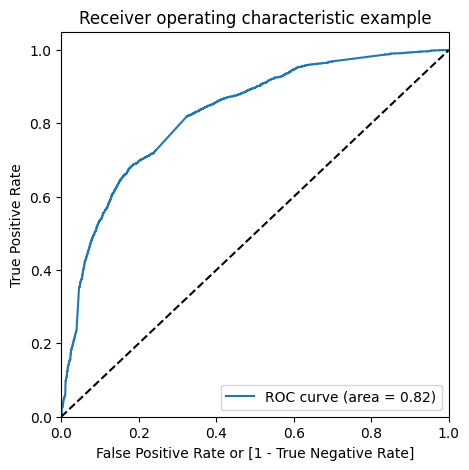

In [120]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

We have 0.82 area under the ROC curve , therefore our model is a good

Finding Optimal Cutoff Point:

Earlier, we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value. Optimal cutoff probability is that probability where we get a balanced sensitivity and specificity.

In [121]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.085346,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.058476,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.333616,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.392020,4750,0,1,1,1,1,0,0,0,0,0,0
4,1,0.834755,7987,1,1,1,1,1,1,1,1,1,1,0


In [122]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.565423  0.965249  0.314981
0.2   0.2  0.633758  0.921504  0.453521
0.3   0.3  0.712014  0.842600  0.630218
0.4   0.4  0.765549  0.686836  0.814853
0.5   0.5  0.767596  0.612428  0.864789
0.6   0.6  0.759723  0.530662  0.903201
0.7   0.7  0.743190  0.437858  0.934443
0.8   0.8  0.672965  0.198692  0.970038
0.9   0.9  0.626988  0.039248  0.995134


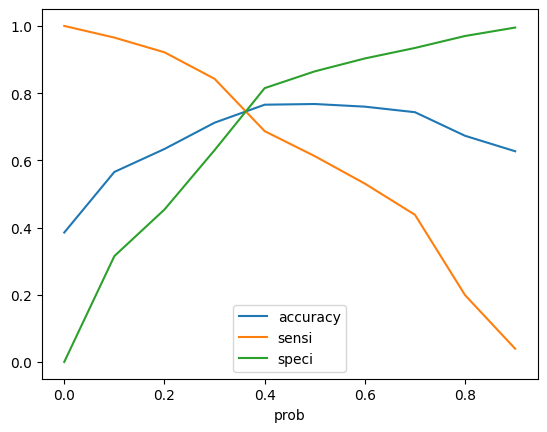

In [123]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.38 is the optimum point to take it as a cutoff probability

In [124]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.085346,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.058476,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.333616,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.392020,4750,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.834755,7987,1,1,1,1,1,1,1,1,1,1,0,1


Assigning Lead Score to the Training data

In [125]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.085346,3009,0,1,0,0,0,0,0,0,0,0,0,0,9
1,0,0.058476,1012,0,1,0,0,0,0,0,0,0,0,0,0,6
2,0,0.333616,9226,0,1,1,1,1,0,0,0,0,0,0,0,33
3,1,0.392020,4750,0,1,1,1,1,0,0,0,0,0,0,1,39
4,1,0.834755,7987,1,1,1,1,1,1,1,1,1,1,0,1,83


Model Evaluation

In [126]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7600377893245158


In [127]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3122,  783],
       [ 741, 1705]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Now the sensitivity of logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.697056418642682


In [130]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7994878361075545


In [131]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.20051216389244558


In [132]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.6852893890675241


In [133]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8081801708516697


Precision and Recall

Precision,also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
Recall, also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [134]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3377,  528],
       [ 948, 1498]], dtype=int64)

In [135]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7393879565646594


In [136]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6124284546197875


In [137]:
from sklearn.metrics import precision_score, recall_score

In [138]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7393879565646594


In [139]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.6124284546197875


Precision and Recall tradeoff

In [140]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6346    0
 6347    0
 6348    1
 6349    0
 6350    1
 Name: predicted, Length: 6351, dtype: int64)

In [141]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

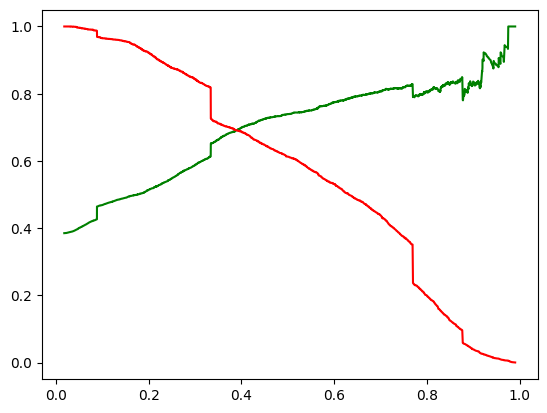

In [142]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Trade-off between Precision and Recall

Making predictions on the test set

In [143]:
# Scaling the test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [144]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Lead Origin,Lead Source,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course
3271,0,3,0.284772,-0.600595,0.955505,3
1490,1,1,0.643547,1.887326,1.510766,0
7936,0,3,-0.432779,-0.752879,-0.155018,3
4216,2,10,-1.150329,-0.888650,-1.265540,0
3830,1,7,1.719873,-0.587751,2.066027,3


In [145]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.029864
1490    0.690014
7936    0.039169
4216    0.769064
3830    0.076808
1800    0.258370
6507    0.249737
4821    0.458147
4223    0.769064
4714    0.088228
dtype: float64

In [146]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [147]:
y_pred_1.head()

,0
3271,0.029864
1490,0.690014
7936,0.039169
4216,0.769064
3830,0.076808


In [148]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [149]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [150]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [151]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [152]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.029864
1,1,1490,0.690014
2,0,7936,0.039169
3,1,4216,0.769064
4,0,3830,0.076808


In [153]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [154]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [155]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.029864
1,1490,1,0.690014
2,7936,0,0.039169
3,4216,1,0.769064
4,3830,0,0.076808


In [156]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.38 else 0)

In [157]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.029864,0
1,1490,1,0.690014,1
2,7936,0,0.039169,0
3,4216,1,0.769064,1
4,3830,0,0.076808,0


In [158]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7675358060962174


In [159]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1408,  326],
       [ 307,  682]], dtype=int64)

In [160]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [161]:
#The sensitivity of logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6895854398382204


In [163]:
# specificityof the model
print("Specificity :",TN / float(TN+FP))

Specificity : 0.81199538638985


Assigning Lead Score to the Testing data

In [164]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.029864,0,3
1,1490,1,0.690014,1,69
2,7936,0,0.039169,0,4
3,4216,1,0.769064,1,77
4,3830,0,0.076808,0,8


Observations:

After running the model on the Test Data , we obtain:

Accuracy : 76.8 %
Sensitivity : 68.9 %
Specificity : 81.2 %

Results:

1) Comparing the values obtained for Train and Test:

Train Data:
Accuracy : 76.0 %
Sensitivity : 69.7 %
Specificity : 79.9 %

Test Data:
Accuracy : 76.8 %
Sensitivity : 68.9 %
Specificity : 81.2 %

Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

2) Finding out the leads which should be contacted:
The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [165]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
15,985,1,0.856142,1,86
21,2461,1,0.876268,1,88
29,8449,0,0.845720,1,85
33,4062,1,0.920239,1,92
35,7696,1,0.906021,1,91
...,...,...,...,...,...
2642,6890,1,0.876268,1,88
2644,4734,1,0.857501,1,86
2645,7823,1,0.924480,1,92
2660,2347,1,0.846087,1,85


So there are 169 leads which can be contacted and have a high chance of getting converted. 

The Prospect ID of the customers to be contacted are:

In [166]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([ 985, 2461, 8449, 4062, 7696, 9049, 4830, 3542, 5330, 5913, 3758,
        337,  737, 2176, 6423, 1436, 2860,  200, 5490, 1995,  999, 1997,
       8687,  211, 6462,  759, 2682, 3589,  952, 5952, 2124, 1663, 6557,
       7521, 9063, 6913, 2985, 7433, 2438, 3384, 2009,  373,  404, 6784,
       6754, 3983,  802, 8745, 4717, 8509, 6094, 7157, 1675, 6999, 6627,
       6499, 7844, 8019, 7910, 1593, 3628, 7129, 6443, 2121, 2495, 3739,
        822, 7132, 1030, 2378, 7013, 4271, 2727, 7489, 4719, 2961, 4532,
       4974, 7202, 1164, 7975, 6538, 1388, 7970, 5184, 6684, 5824,  170,
       2345, 4578, 2367, 2584, 1454, 1025, 9068, 6664, 4613, 4051, 3914,
       1899, 8962, 7893, 3248,  100,  219, 2486, 2158, 3355, 4965, 8521,
       6031, 3501, 5313, 7720, 6729,  722, 2011, 6252, 6760, 8563,  854,
       8775, 7018,  356, 1186, 1444, 2652, 7057, 6819, 2611, 9062, 6636,
       8265, 4243, 4726, 7193, 4828, 4374, 2354, 8583, 4737, 5175, 2812,
       3207, 8505, 6175, 3770, 1112, 9168, 8592, 85

3) Finding out the Important Features from our final model:

In [167]:
res.params.sort_values(ascending=False)

Total Time Spent on Website                      1.071768
Lead Origin                                      0.570193
Lead Source                                      0.188630
TotalVisits                                      0.139157
Page Views Per Visit                            -0.489794
What matters most to you in choosing a course   -0.547864
const                                           -1.331004
dtype: float64

Recommendations:

The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.

The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.

The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.

The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.

The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.

The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.

The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.

The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.